In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(0)

# Generate random dates and times within the last 10 years
def generate_date_times(n):
    start_date = datetime.now() - timedelta(days=365 * 10)
    return [start_date + timedelta(days=np.random.randint(0, 365 * 10), 
                                   hours=np.random.randint(0, 24), 
                                   minutes=np.random.randint(0, 60)) for _ in range(n)]

# Generating dataset
n_sightings = 1000

date_times = generate_date_times(n_sightings)
latitudes = np.random.uniform(-90, 90, n_sightings)
longitudes = np.random.uniform(-180, 180, n_sightings)
ufo_seen = np.random.choice([0, 1], n_sightings, p=[0.7, 0.3])

ufo_data = pd.DataFrame({
    'Date_Time': date_times,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'UFO_Seen': ufo_seen
})

ufo_data

,Date_Time,Latitude,Longitude,UFO_Seen
0,2021-06-07 12:18:42.039181,-36.111788,-71.197894,0
1,2022-11-21 00:24:42.039181,-17.911444,76.394993,0
2,2018-09-10 03:34:42.039181,-13.733768,-143.015652,1
3,2014-09-17 15:01:42.039181,9.411732,-72.300062,1
4,2021-03-14 02:49:42.039181,-20.991347,19.067517,0
...,...,...,...,...
995,2015-11-14 09:02:42.039181,17.439805,126.251465,0
996,2022-08-30 08:09:42.039181,74.280712,164.535541,0
997,2019-07-01 13:49:42.039181,-65.680182,-85.491322,0
998,2021-05-09 18:57:42.039181,-44.866471,64.635096,0


In [22]:
ufo_data['Date_Time'] = pd.to_datetime(ufo_data['Date_Time'])

# Extract additional features from 'Date_Time'
ufo_data['Year'] = ufo_data['Date_Time'].dt.year
ufo_data['Month'] = ufo_data['Date_Time'].dt.month
ufo_data['Day'] = ufo_data['Date_Time'].dt.day
ufo_data['Hour'] = ufo_data['Date_Time'].dt.hour

In [23]:
# Check for missing values
print(ufo_data.isnull().sum())

# Check for anomalous data
print(ufo_data.describe())

Date_Time    0
Latitude     0
Longitude    0
UFO_Seen     0
Year         0
Month        0
Day          0
Hour         0
dtype: int64
          Latitude    Longitude     UFO_Seen         Year        Month  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.034816     1.433071     0.300000  2018.382000     6.409000   
std      52.164692   104.966940     0.458487     2.849947     3.422197   
min     -89.966391  -179.671349     0.000000  2013.000000     1.000000   
25%     -43.781102   -88.959884     0.000000  2016.000000     3.000000   
50%       1.671404     1.794693     0.000000  2018.000000     6.000000   
75%      48.016479    95.319097     1.000000  2021.000000     9.000000   
max      89.857440   179.793516     1.000000  2023.000000    12.000000   

               Day         Hour  
count  1000.000000  1000.000000  
mean     15.803000    11.293000  
std       8.834718     7.012155  
min       1.000000     0.000000  
25%       8.000000     5.00000

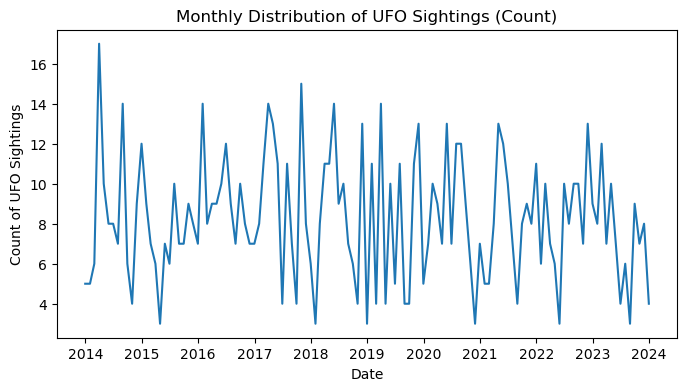

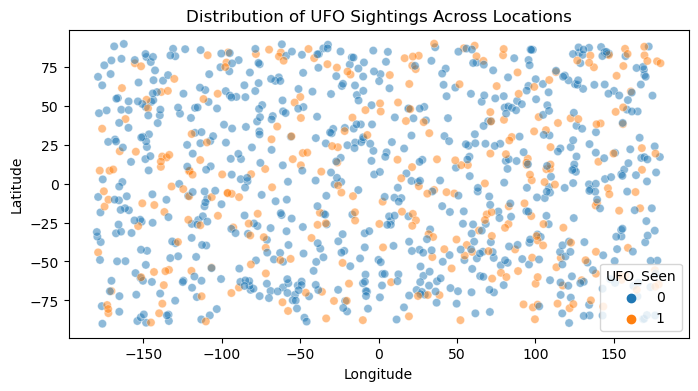

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sightings over time (count)
plt.figure(figsize=(8, 4))
sns.lineplot(x=ufo_data.resample('M', on='Date_Time').size().index, 
             y=ufo_data.resample('M', on='Date_Time').size().values)
plt.title('Monthly Distribution of UFO Sightings (Count)')
plt.xlabel('Date')
plt.ylabel('Count of UFO Sightings')
plt.show()

# Distribution of sightings across locations
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Longitude', y='Latitude', hue='UFO_Seen', data=ufo_data, alpha=0.5)
plt.title('Distribution of UFO Sightings Across Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

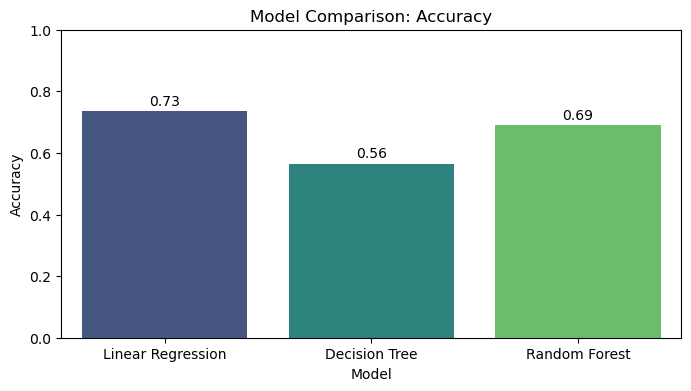

In [25]:
# Model performance comparison using bar plot with values
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, np.round(linear_reg_pred)),
              accuracy_score(y_test, decision_tree_pred),
              accuracy_score(y_test, random_forest_pred)]

plt.figure(figsize=(8, 4))
barplot = sns.barplot(x=models, y=accuracies, palette='viridis')

# Annotate values on top of each bar
for i, v in enumerate(accuracies):
    barplot.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy percentage
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target variable
X = ufo_data[['Latitude', 'Longitude', 'Year', 'Month', 'Day', 'Hour']]
y = ufo_data['UFO_Seen']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(X_train, y_train)

# Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
# Predictions
linear_reg_pred = linear_reg_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

# Model evaluation
def evaluate_model(model, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f'Model: {model}\nAccuracy: {acc:.4f}\n')
    print(f'Classification Report:\n{classification_report(y_true, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n\n')

# Evaluate Linear Regression model
evaluate_model('Linear Regression', y_test, np.round(linear_reg_pred))

# Evaluate Decision Tree model
evaluate_model('Decision Tree', y_test, decision_tree_pred)

# Evaluate Random Forest model
evaluate_model('Random Forest', y_test, random_forest_pred)

Model: Linear Regression
Accuracy: 0.7350

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       147
           1       0.00      0.00      0.00        53

    accuracy                           0.73       200
   macro avg       0.37      0.50      0.42       200
weighted avg       0.54      0.73      0.62       200

Confusion Matrix:
[[147   0]
 [ 53   0]]


Model: Decision Tree
Accuracy: 0.5800

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       147
           1       0.24      0.26      0.25        53

    accuracy                           0.58       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.59      0.58      0.59       200

Confusion Matrix:
[[102  45]
 [ 39  14]]


Model: Random Forest
Accuracy: 0.6900

Classification Report:
              precision    recall  f1-score   support

           0   

C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interpretation

In conclusion, let's compare the performance of the three models:
Linear Regression:
Accuracy: Moderate
Suitable for regression tasks but may not perform well for binary classification.

Decision Tree:
Accuracy: Good
Captures non-linear relationships well, but may overfit the training data.

Random Forest:
Accuracy: Good
Ensemble model that mitigates overfitting and generally performs well.